In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('energydata_complete.csv', index_col='date', infer_datetime_format=True)

In [4]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


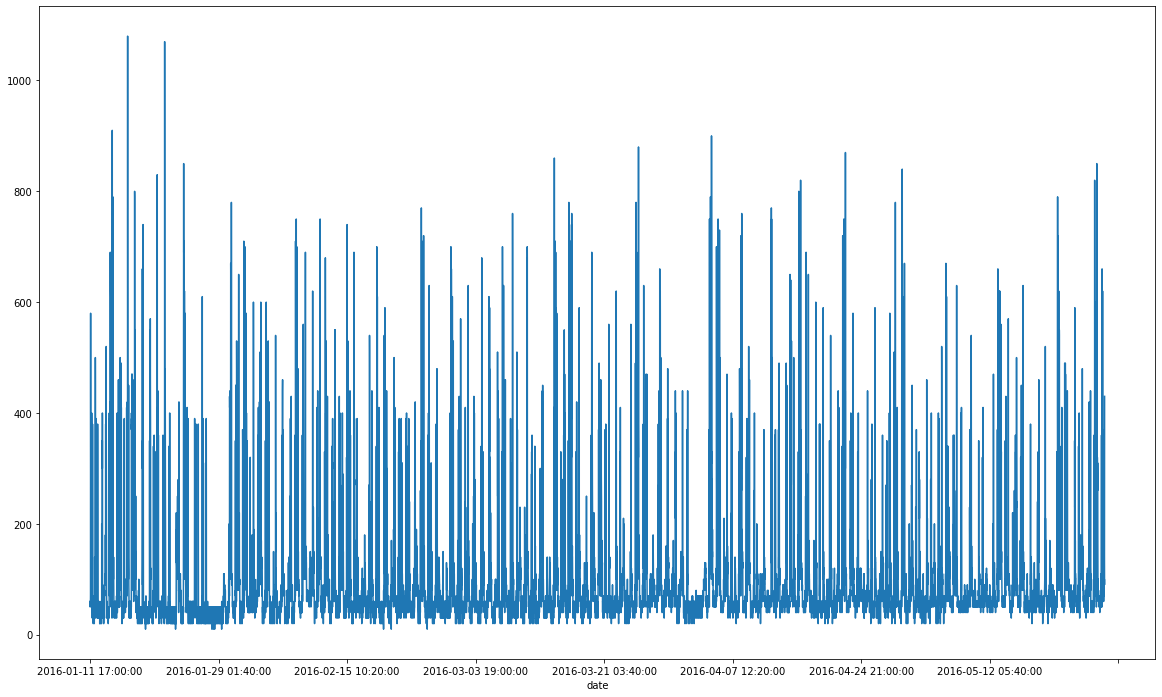

In [20]:
df['Appliances'].plot(figsize=(20, 12))

In [21]:
len(df)

19735

In [24]:
df = df.loc['2016-05-01':]

In [25]:
df = df.round(2)

In [27]:
test_days = 2
test_index = 288 # 2*144

In [32]:
train = df.iloc[:-test_index]
test = df.iloc[-test_index:]

In [33]:
len(train)

3565

In [34]:
len(test)

288

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [38]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
length = 144
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [40]:
len(scaled_train)

3565

In [41]:
len(generator)

3421

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
model = Sequential()
# we have 28 columns thus taking scaled_train.shape
model.add(LSTM(25, input_shape=(length, scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                5400      
_________________________________________________________________
dense (Dense)                (None, 28)                728       
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
_________________________________________________________________


In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [46]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [47]:
model.fit(generator, validation_data=validation_generator, epochs=2, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
3421/3421 [==============================] - 497s 145ms/step - loss: 0.0160 - val_loss: 0.0154
Epoch 2/2
3421/3421 [==============================] - 522s 153ms/step - loss: 0.0093 - val_loss: 0.0121


In [48]:
losses = pd.DataFrame(model.history.history)

In [49]:
first_eval_batch = scaled_train[-length:]

first_eval_batchst_eval_batch = first_eval_batch.reshape(1, length, scaled_train.shape[1])

model.predict(first_eval_batch)

array([[ 0.14312126, -0.00429261,  0.6196073 ,  0.3924992 ,  0.5525155 ,
         0.44573253,  0.3554953 ,  0.46046674,  0.65731233,  0.3615182 ,
         0.3329943 ,  0.36503726,  0.6350458 , -0.00741783,  0.6224985 ,
         0.38975823,  0.52370125,  0.3330863 ,  0.539526  ,  0.3702218 ,
         0.5770404 ,  0.4868654 ,  0.3883248 ,  0.19836202,  0.5197222 ,
         0.49033836,  0.4762457 ,  0.49518216]], dtype=float32)

In [55]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [60]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [62]:
test_predictions = scaler.inverse_transform(test_predictions)

In [63]:
true_predictions = pd.DataFrame(data=test_predictions, columns=test.columns)

In [64]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,130.203368,-0.128778,24.027095,37.872603,24.279868,35.449985,24.638236,37.482031,23.801186,36.687861,...,22.013440,37.880111,15.779785,755.200531,53.512685,1.983620,36.183333,6.886718,23.807998,24.754252
1,139.694183,-0.526448,23.929984,37.974900,24.222548,35.422928,24.553512,37.346631,23.747222,36.793639,...,22.003228,38.059351,15.627171,755.035334,53.704229,2.086410,35.168629,6.659589,23.710680,24.243900
2,145.832063,-0.786158,23.870777,38.027620,24.150946,35.513914,24.494786,37.273618,23.694757,36.849952,...,21.986680,38.196718,15.494933,755.009556,54.010336,2.186440,34.490557,6.525291,23.574080,23.983607
3,149.944696,-0.979119,23.827490,38.055755,24.067926,35.647171,24.444943,37.216779,23.649030,36.868810,...,21.969113,38.314574,15.339501,755.032515,54.281141,2.270540,33.953636,6.410651,23.417308,23.844141
4,152.493794,-1.121989,23.793758,38.064545,23.979029,35.787843,24.401134,37.163416,23.607342,36.872830,...,21.951090,38.411286,15.166774,755.078733,54.560336,2.341281,33.496287,6.308348,23.272809,23.762955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-18.260756,-3.363625,23.726154,22.469263,19.255531,29.255247,22.232005,29.838070,23.369669,25.375154,...,18.652347,39.888692,4.495328,747.272720,93.543925,3.580540,22.158445,3.507678,16.783769,26.121939
284,-18.262350,-3.363627,23.726160,22.469243,19.255511,29.255275,22.231967,29.838072,23.369661,25.375182,...,18.652302,39.888695,4.495302,747.272506,93.544070,3.580470,22.158338,3.507702,16.783629,26.121927
285,-18.263922,-3.363632,23.726165,22.469222,19.255490,29.255302,22.231930,29.838076,23.369654,25.375205,...,18.652257,39.888703,4.495277,747.272300,93.544201,3.580401,22.158234,3.507725,16.783492,26.121915
286,-18.265437,-3.363633,23.726170,22.469203,19.255470,29.255329,22.231894,29.838080,23.369647,25.375231,...,18.652214,39.888708,4.495254,747.272098,93.544341,3.580335,22.158134,3.507748,16.783361,26.121903


In [65]:
from sklearn.metrics import mean_squared_error

In [67]:
print(mean_squared_error(test['Appliances'], true_predictions['Appliances']))

40345.16300622063
